<a href="https://colab.research.google.com/github/mhdykz/predict-student-GPA-using-a-neural-network/blob/main/student_GPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [32]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [33]:
X = train_data.drop(columns=['StudentID', 'GPA'])
y = train_data['GPA']

In [34]:
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport',
                       'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
numerical_columns = ['Age', 'StudyTimeWeekly', 'Absences']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [36]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)

X_train_preprocessed.shape, X_val_preprocessed.shape



((1147, 27), (383, 27))

In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [38]:
from tensorflow.keras import regularizers

model = models.Sequential()

model.add(layers.InputLayer(input_shape=(X_train_preprocessed.shape[1],)))

model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [39]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

history = model.fit(X_train_preprocessed, y_train, validation_data=(X_val_preprocessed, y_val),
                    epochs=200, batch_size=32, callbacks=[early_stopping])



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,905 (15.25 KB)

 Trainable params: 3,905 (15.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.3427 - val_loss: 1.0249
Epoch 2/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2394 - val_loss: 0.4680
Epoch 3/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7230 - val_loss: 0.2768
Epoch 4/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5813 - val_loss: 0.1922
Epoch 5/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5018 - val_loss: 0.1806
Epoch 6/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4205 - val_loss: 0.1701
Epoch 7/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3857 - val_loss: 0.1605
Epoch 8/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4146 - val_loss: 0.1585
Epoch 9/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3747 - val_loss: 0.1410
Epoch 10/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3607 - val_loss: 0.1781
Epoch 11/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3538 - val_loss: 0.1612
Epoch 12/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3

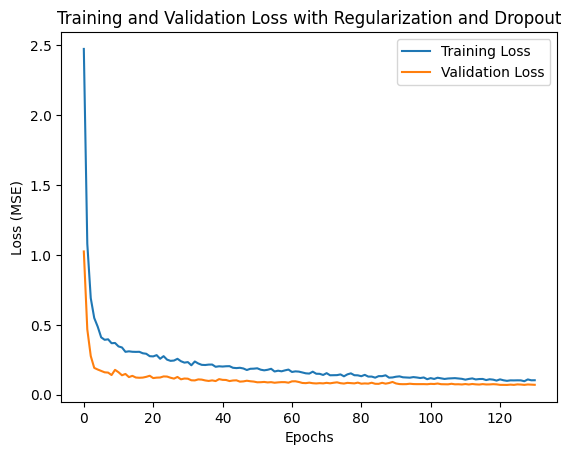

In [40]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with Regularization and Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import r2_score

X_test = test_data.drop(columns=['StudentID', 'GPA'])
y_test = test_data['GPA']
X_test_preprocessed = preprocessor.transform(X_test)